In [ ]:
%reset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV
import sklearn.model_selection as model_selection

In [2]:
data = pd.read_csv("fetal_health.csv")
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
# X = data[['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']]
X = data[['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']]
y = data['fetal_health']

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=42)


In [4]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

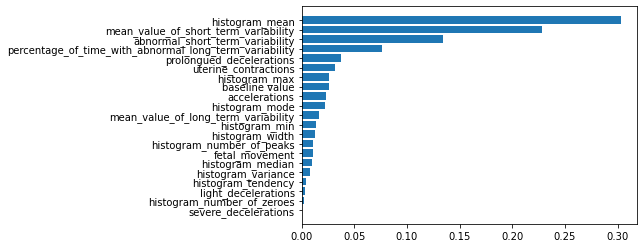

In [6]:
features = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']

f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()



In [8]:
rfe = RFECV(rf,cv=10,scoring="neg_mean_squared_error")
rfe.fit(X_train,y_train)
selected_features = np.array(features)[rfe.get_support()]



In [9]:
selected_features

array(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance'], dtype='<U54')

In [10]:
X = data[selected_features]


In [11]:
display(X_train.head(3))
display(X_train.shape)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
394,143.0,0.000,0.000,0.001,0.000,0.0,0.0,56.0,0.6,12.0,...,116.0,68.0,184.0,5.0,1.0,145.0,145.0,147.0,3.0,1.0
952,136.0,0.010,0.000,0.006,0.003,0.0,0.0,35.0,1.2,0.0,...,94.0,65.0,159.0,5.0,0.0,144.0,140.0,144.0,19.0,1.0
39,115.0,0.009,0.055,0.005,0.000,0.0,0.0,27.0,2.3,0.0,...,129.0,53.0,182.0,7.0,0.0,119.0,120.0,120.0,14.0,0.0


(1594, 21)

In [12]:
display(y_train.head(3))
display(y_train.shape)

394    1.0
952    1.0
39     1.0
Name: fetal_health, dtype: float64

(1594,)

In [15]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

R2 Score for train data: 1.0
R2 Score2 for test data: 0.8318
MAE Score for test data:  0.05


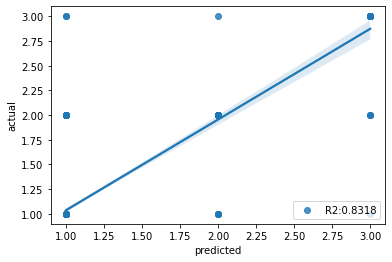

In [16]:
print('R2 Score for train data:', round(model.score(X_train,y_train),4))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),4))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))
df = pd.DataFrame({
            'actual':y_test,
            'predicted':y_pred
        })
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),4)))
plt.legend(loc=0)
plt.show()

In [17]:
# The model is overfiting 

In [22]:

grid_space = {
    'n_estimators' : [10,50,100,150],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf':[1,2,3],
    'max_depth' : [3,8,15,20]
}

model = GridSearchCV(RandomForestClassifier(), param_grid = grid_space, cv = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

df = pd.DataFrame(model.cv_results_)

In [23]:
display(model.best_params_)
display(model.best_score_)

df.sort_values('rank_test_score', ascending = True).head(3)

{'max_depth': 20,
 'max_features': 7,
 'min_samples_leaf': 3,
 'n_estimators': 150}

0.9404112694938979

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
191,0.380386,0.015300,0.016812,0.000970,20,7,3,150,"{'max_depth': 20, 'max_features': 7, 'min_samp...",0.927900,0.949843,0.934169,0.934169,0.955975,0.940411,0.010636,1
122,0.222603,0.010034,0.012207,0.000748,15,5,1,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.927900,0.937304,0.937304,0.943574,0.952830,0.939782,0.008223,2
181,0.131808,0.002716,0.006998,0.000003,20,7,1,50,"{'max_depth': 20, 'max_features': 7, 'min_samp...",0.912226,0.931034,0.940439,0.949843,0.962264,0.939161,0.016977,3
